In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report, precision_recall_curve

In [225]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 667.8 kB/s eta 0:02:30
   ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.4/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.6/99.8 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 0.8/99.8 MB 3.2 MB/s eta 0:00:31
   ---------------------------------------- 1.0/99.8 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.3/99.8 MB 3.8 MB/s eta 0:00:26
    --------------------------------------- 1.6/99.8 MB 4.0 MB/s eta 0:00:25
    ---------------------------------

 # Part 1 ‐ Exploratory data analysis
 The attached logins.json file contains (simulated) timestamps of user logins in a particular
 geographic location. Aggregate these login counts based on 15 minute time intervals, and
 visualize and describe the resulting time series of login counts in ways that best characterize the
 underlying patterns of the demand. Please report/illustrate important features of the demand,
 such as daily cycles. If there are data quality issues, please report them

In [300]:
df = pd.read_json('logins.json')

In [301]:
df.isnull().sum()

login_time    0
dtype: int64

In [302]:
df['login_time'].min() , df['login_time'].max()
# Date from 1st Jan 1979 to 13th April 1970

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

In [303]:
df15min = df.groupby(pd.Grouper(key="login_time", freq="15Min"))['login_time'].count()

In [304]:
df15min.head(10)

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
1970-01-01 21:15:00    4
1970-01-01 21:30:00    0
1970-01-01 21:45:00    4
1970-01-01 22:00:00    9
1970-01-01 22:15:00    8
Freq: 15T, Name: login_time, dtype: int64

In [305]:
df15min = df15min.to_frame()

In [306]:
df15min.rename(columns={'login_time':'count'},inplace=True)

In [307]:
df15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [308]:
df15min.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [309]:
df15min['day'] = df15min.index.dayofweek
df15min['hour'] = df15min.index.hour
df15min['week'] = df15min.index.week
df15min['month'] = df15min.index.month

C:\Users\elave\AppData\Local\Temp\ipykernel_30688\721004130.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df15min['week'] = df15min.index.week


In [310]:
df15min = df15min.drop(columns=['weekday', 'weekend'])

KeyError: "['weekday', 'weekend'] not found in axis"

In [311]:
df15min

,count,day,hour,week,month
login_time,,,,,
1970-01-01 20:00:00,2,3,20,1,1
1970-01-01 20:15:00,6,3,20,1,1
1970-01-01 20:30:00,9,3,20,1,1
1970-01-01 20:45:00,7,3,20,1,1
1970-01-01 21:00:00,1,3,21,1,1
...,...,...,...,...,...
1970-04-13 17:45:00,5,0,17,16,4
1970-04-13 18:00:00,5,0,18,16,4
1970-04-13 18:15:00,2,0,18,16,4


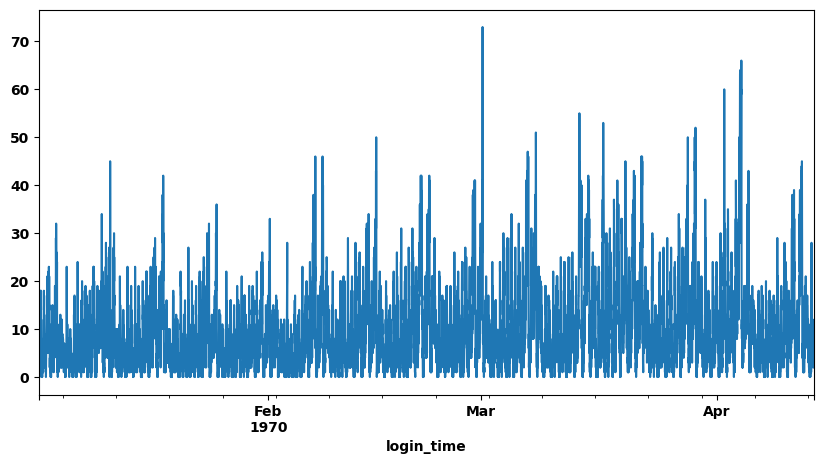

In [312]:
_=  df15min['count'].plot()
# Overall line plot

In [313]:

df0_6 = df15min['count'].between_time('0:00', '6:00')
df6_12 = df15min['count'].between_time('6:01', '12:00')
df12_18 = df15min['count'].between_time('12:01', '18:00')
df18_24 = df15min['count'].between_time('18:01', '23:59')

# Demand is high in the early morning and evening

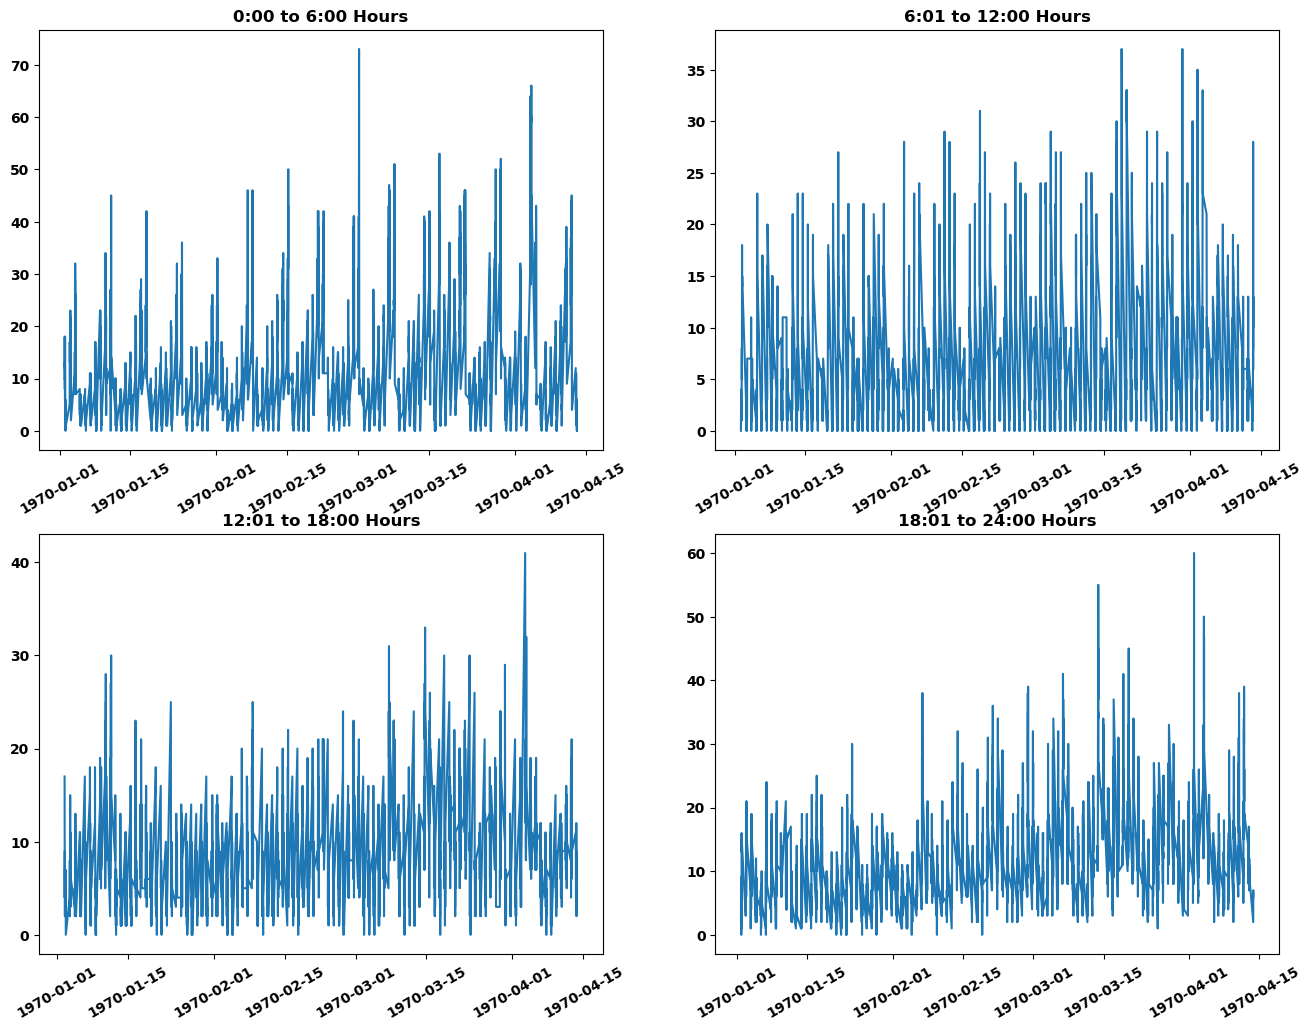

In [314]:
figure, ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].plot(df0_6)
ax[0,1].plot(df6_12)
ax[1,0].plot(df12_18)
ax[1,1].plot(df18_24)
ax[0,0].tick_params(axis='x', labelrotation=30)
ax[0,1].tick_params(axis='x', labelrotation=30)
ax[1,0].tick_params(axis='x', labelrotation=30)
ax[1,1].tick_params(axis='x', labelrotation=30)
ax[0,0].title.set_text('0:00 to 6:00 Hours')
ax[0,1].title.set_text('6:01 to 12:00 Hours')
ax[1,0].title.set_text('12:01 to 18:00 Hours')
ax[1,1].title.set_text('18:01 to 24:00 Hours')
plt.show()

# The demand is more from 9 Pm to 4 AM and in the noon between 11 - 12 PM

<Axes: xlabel='hour', ylabel='count'>

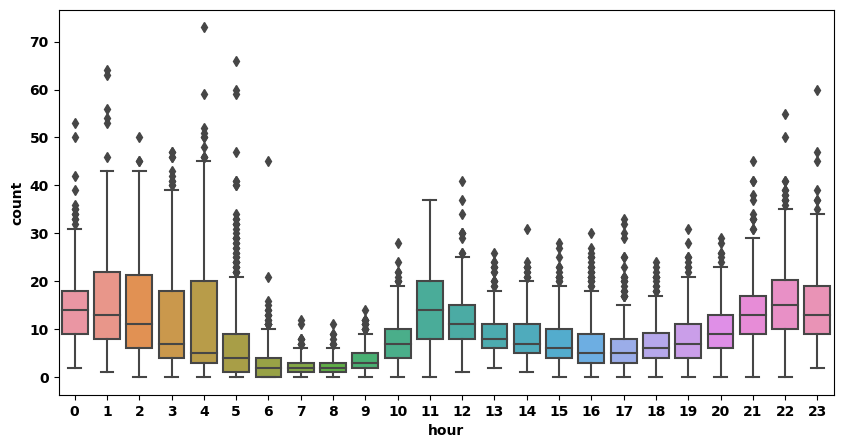

In [315]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour',y='count',data=df15min)

# Demand was comparatively high in March and April

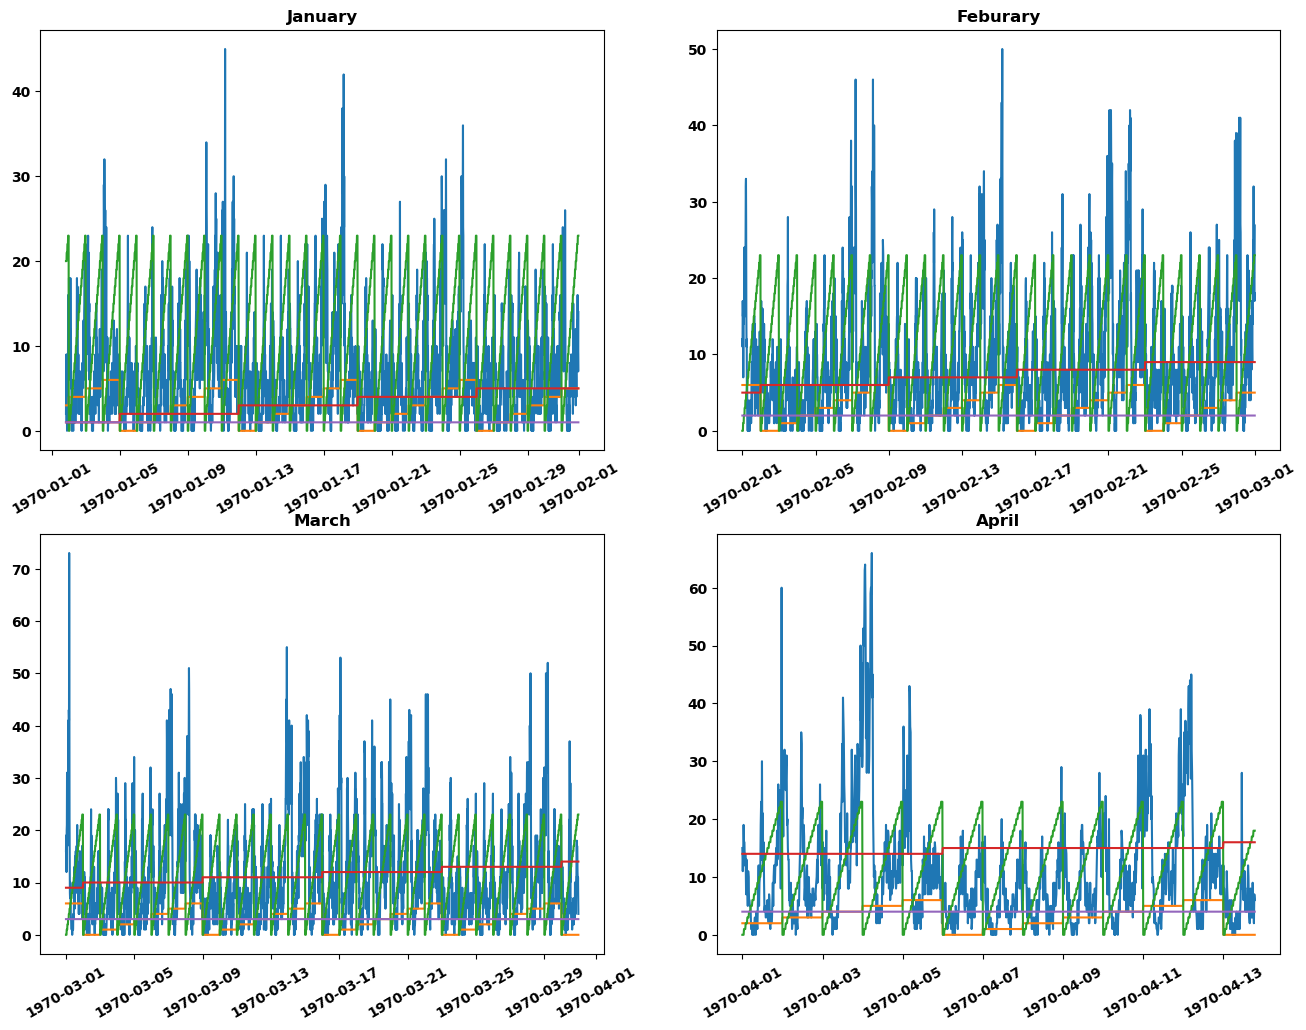

In [316]:
figure, ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].plot(df15min["1970-01-01":"1970-01-31"])
ax[0,1].plot(df15min["1970-02-01":"1970-02-28"])
ax[1,0].plot(df15min["1970-03-01":"1970-03-30"])
ax[1,1].plot(df15min["1970-04-01":"1970-04-13"])
ax[0,0].tick_params(axis='x', labelrotation=30)
ax[0,1].tick_params(axis='x', labelrotation=30)
ax[1,0].tick_params(axis='x', labelrotation=30)
ax[1,1].tick_params(axis='x', labelrotation=30)
ax[0,0].title.set_text('January')
ax[0,1].title.set_text('Feburary')
ax[1,0].title.set_text('March')
ax[1,1].title.set_text('April')
plt.show()

<Axes: xlabel='month', ylabel='count'>

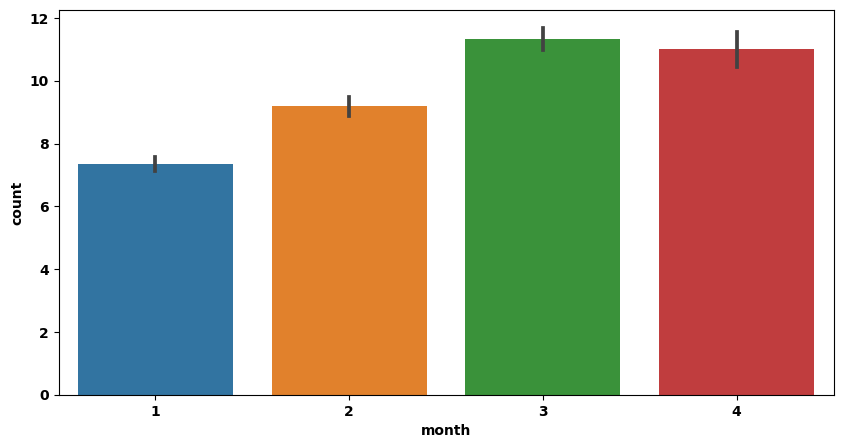

In [317]:
sns.barplot(x='month',y='count',data=df15min)

# Demand keeps increasing form monday to saturday. then drop on sunday. High demand is on saturday, followed by sunday and friday

<Axes: xlabel='day', ylabel='count'>

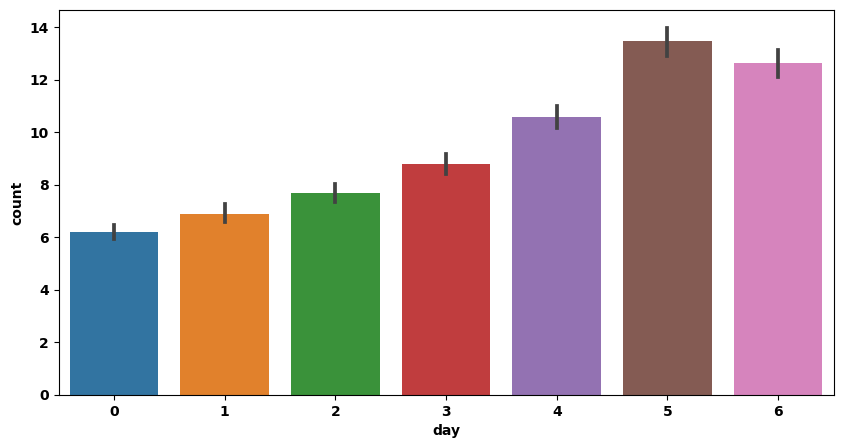

In [318]:
sns.barplot(x='day',y='count',data=df15min)

# Part 2 ‐ Experiment and metrics design
 The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
 weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
 during the day. On weekends, there is reasonable activity in both cities.
 However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
 to be exclusive to each city. The Ultimate managers of city operations for the two cities have
 proposed an experiment to encourage driver partners to be available in both cities, by
 reimbursing all toll costs.
 1) What would you choose as the key measure of success of this experiment in
 encouraging driver partners to serve both cities, and why would you choose this metric?
 2) Describe a practical experiment you would design to compare the effectiveness of the
 proposed change in relation to the key measure of success. Please provide details on:
 a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
 observation
 c) how you would interpret the results and provide recommendations to the city
 operations team along with any caveats.
 Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
 not need this information to answer Part 2

# Solution


1) The key to success is percentage of increase in total reimbursement in each toll. If there is increase in the percentage in both tools, it means there is increase in availablity of drivers in both cities

2) Collect data of the total toll reimbursement done by the drivers. The data will contains which toll the reimbursement belong to, data, time, weekend, weekday. Find percentage of how much reimbursement has been done since the day the experiment was started. Visualize the data to see the trends. Conduct T test to check for signifance of the experiment. Present the findings to the city operation on how effective based on the trend and percent change


# Part 3 ‐ Predictive modeling
 Ultimate is interested in predicting rider retention. To help explore this question, we have
 provided a sample dataset of a cohort of users who signed up for an Ultimate account in
 January 2014. The data was pulled several months later; we consider a user retained if they
 were “active” (i.e. took a trip) in the preceding 30 days.
 We would like you to use this data set to help understand what factors are the best predictors
 for retention, and offer suggestions to operationalize those insights to help Ultimate.
 The data is in the attached file ultimate_data_challenge.json. See below for a detailed
 description of the dataset. Please include any code you wrote for the analysis and delete the
 dataset when you have finished with the challenge.
 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
 data for this analysis (a few sentences/plots describing your approach will suffice). What
 fraction of the observed users were retained?
 2. Build a predictive model to help Ultimate determine whether or not a user will be active in
 their 6th month on the system. Discuss why you chose your approach, what alternatives
 you considered, and any concerns you have. How valid is your model? Include any key
 indicators of model performance.
 3. Briefly discuss how Ultimate might leverage the insights gained from the model to
 improve its long term rider retention (again, a few sentences will suffice).
Data description
 ● city: city this user signed up in
 ● phone: primary device for this user
 ● signup_date: date of account registration; in the form ‘YYYYMMDD’
 ● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
 ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
 ● avg_rating_by_driver: the rider’s average rating over all of their trips
 ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
 ● surge_pct: the percent of trips taken with surge multiplier > 1
 ● avg_surge: The average surge multiplier over all of this user’s trips
 ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
 ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
 otherwise
 ● weekday_pct: the percent of the user’s trips occurring during a weekda

In [319]:
rider = pd.read_json("ultimate_data_challenge.json")

In [320]:
rider.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [321]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


 Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
 data for this analysis (a few sentences/plots describing your approach will suffice). What
 fraction of the observed users were retained?

In [322]:
rider['avg_rating_of_driver'].fillna(rider['avg_rating_of_driver'].mean(),inplace=True)

In [323]:
rider['avg_rating_by_driver'].fillna(rider['avg_rating_of_driver'].mean(),inplace=True)

In [324]:
rider.dropna(axis=0, inplace=True)

In [325]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [326]:
# convert to date time
rider["signup_date"] = pd.to_datetime(rider["signup_date"])
rider["last_trip_date"] = pd.to_datetime(rider["last_trip_date"])

In [327]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [328]:
rider["ultimate_black_user"].replace({0: False, 1: True}, inplace=True)

In [329]:
rider["ultimate_black_user"].replace({False: 0, True: 1}, inplace=True)

In [330]:
rider.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.601482,1.074991,8.875314,0.375212,60.883832,5.785418,4.777157
std,3.793300,0.565227,0.222666,19.989018,0.484182,37.086239,5.669709,0.446359
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.700000,1.000000,100.000000,6.930000,5.000000
max,125.000000,5.000000,8.000000,100.000000,1.000000,100.000000,160.960000,5.000000


# Exploratory data analysis

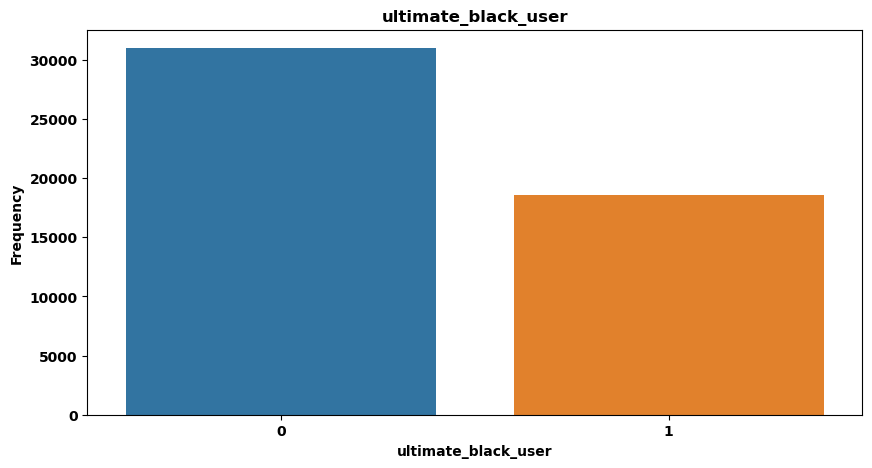

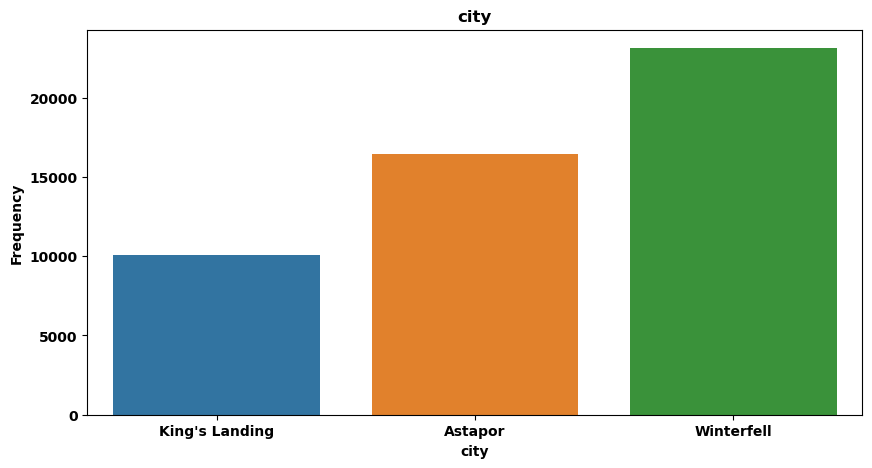

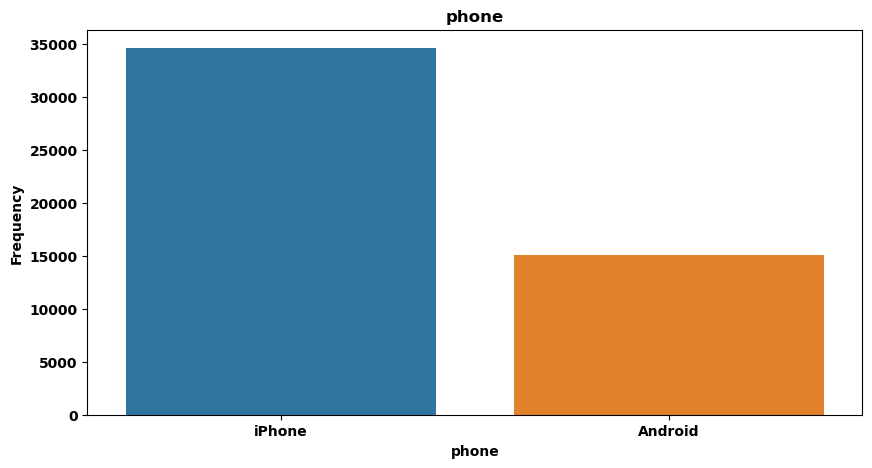

In [331]:
# Bar plot for categorical feature to find which is used more
category_col = ['ultimate_black_user','city','phone']

for col in category_col:
    sns.countplot(x=col,data=rider)
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


# City - most are from Winterfell, Iphone user is more than android, Many of the user are not subscribed to Black

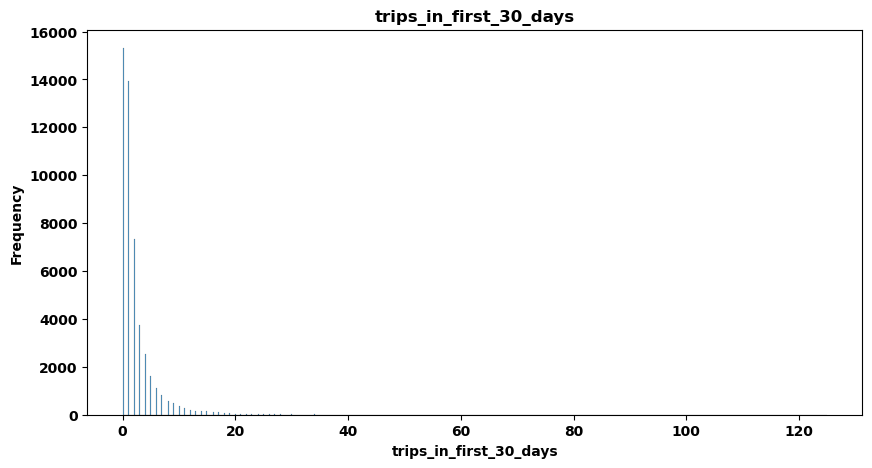

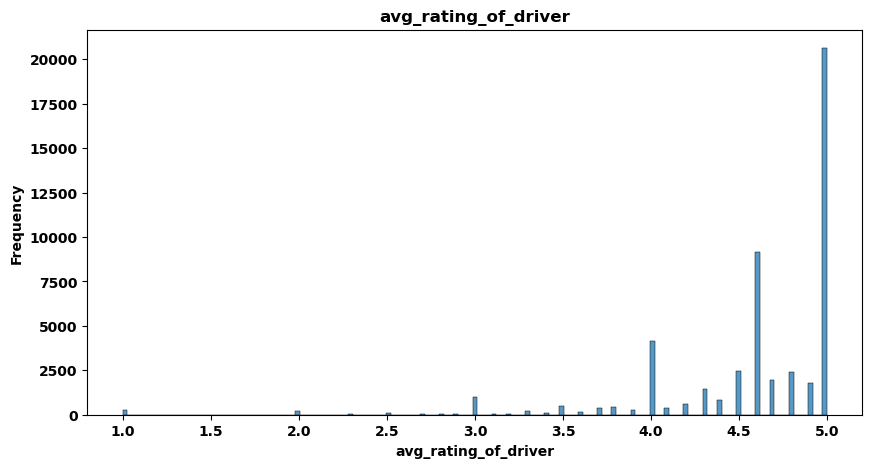

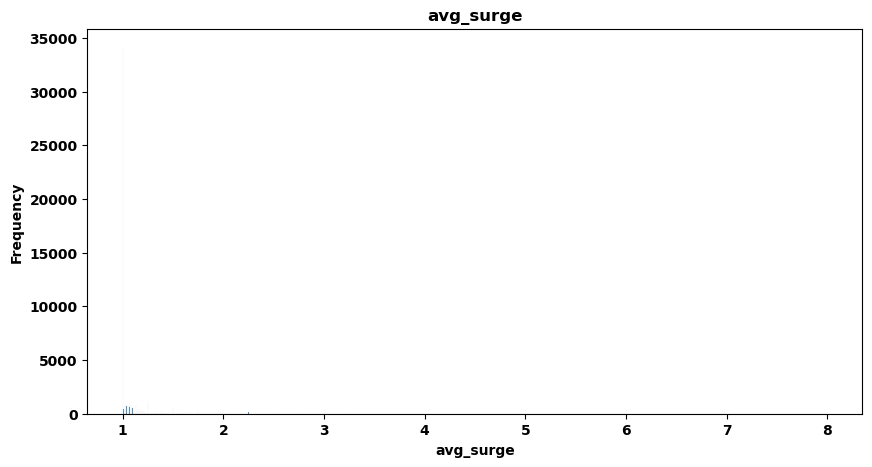

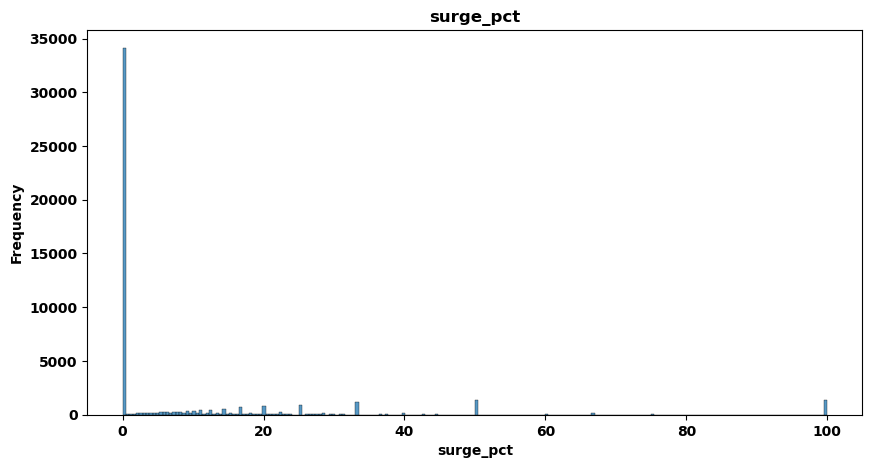

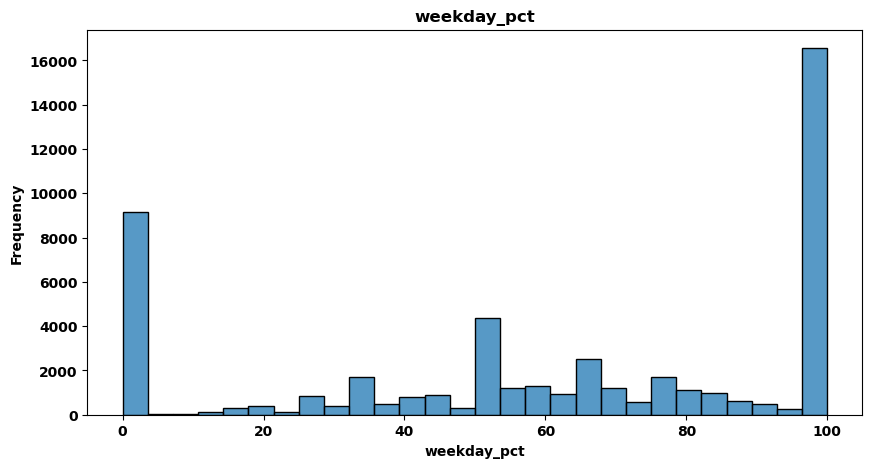

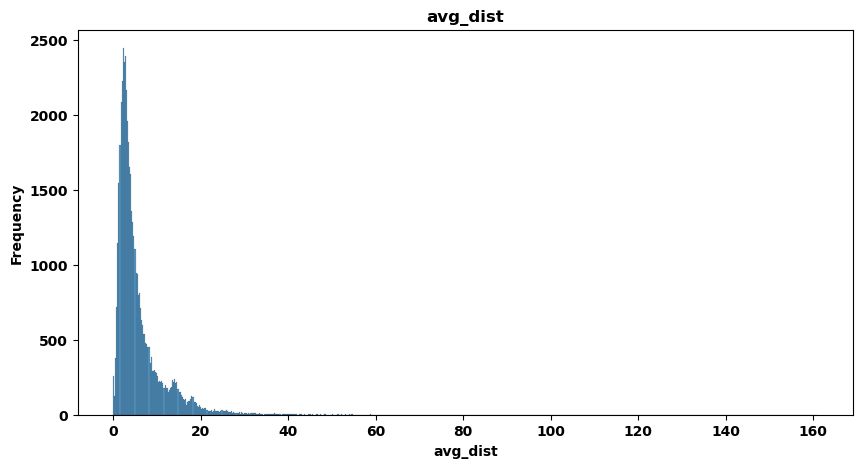

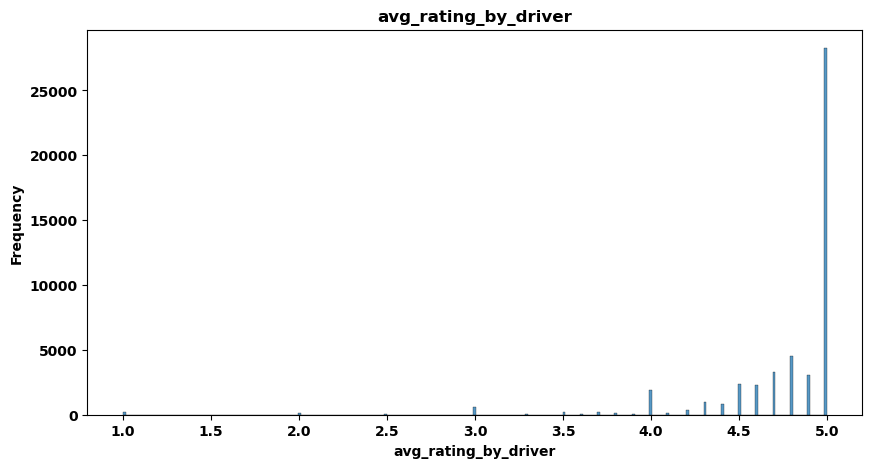

In [332]:
# Hist plot for numerical feature to find the distribution
numerical_col = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']

for col in numerical_col:
    sns.histplot(x=rider[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

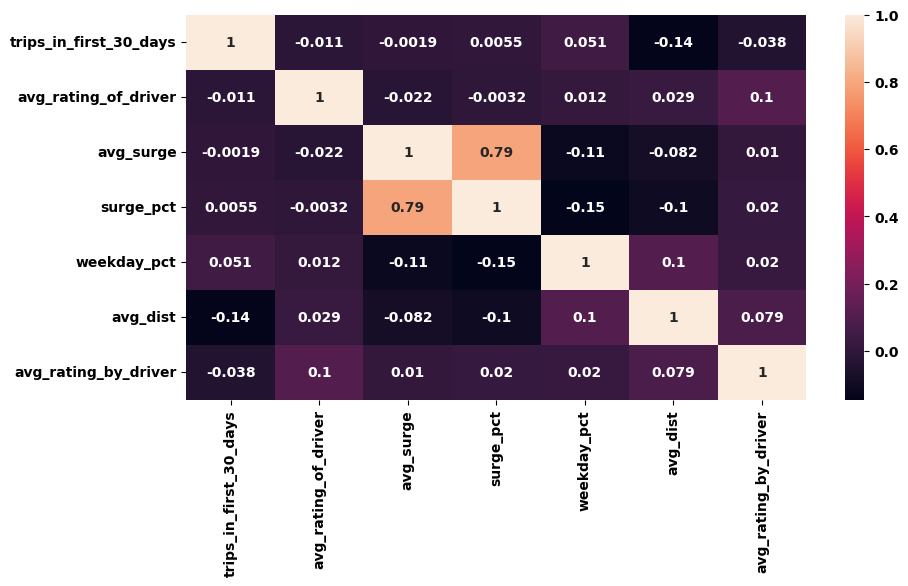

In [333]:
# correlation for finding any correlation between features. Highly correlated independant variables need to be dropped
sns.heatmap(rider[numerical_col].corr(), annot=True)

# What fraction of the observed users were retained?

Definition of retained - active in the previous 30 days



In [334]:
rider['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [335]:
#Any user active after 2014-06-01 are retained users

len(rider[rider['last_trip_date'] > '2014-06-01'])

18180

In [336]:
Fraction = len(rider[rider['last_trip_date'] > '2014-06-01'])/len(rider) 

In [337]:
Fraction

0.3665027013950488

In [338]:
print("Percentage of users retained - {:.2f}% ".format(Fraction *100) )

Percentage of users retained - 36.65% 


# Predictive modeling

In [339]:
# Create dependant variable label

rider['retain'] = rider['last_trip_date'] > '2014-06-01'

In [340]:
rider['retain'].value_counts()

False    31424
True     18180
Name: retain, dtype: int64

In [341]:
# convert bool to numeric
rider['retain'] .replace({True:1,False:0},inplace=True)

In [342]:
# convert bool to numeric
rider["ultimate_black_user"].replace({False: 0, True: 1}, inplace=True)

In [343]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  int64         
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  retain                  49604 non-null  int64 

In [344]:
rider = pd.get_dummies(rider, columns = ['city', 'phone'], drop_first=True)


In [345]:
rider.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,1,0


In [346]:
# Drop datetime features
rider.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [347]:
X = rider.drop('retain',axis=1)
y = rider['retain']

In [348]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

XGBoost classifier will be used as final model which is quite popular model and gives high accurary compared to the random forest. Also XGBoost is faster.

In [349]:
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [350]:
from xgboost import XGBClassifier

param = {
    'n_estimators':[100,150,200],
    'max_depth':[10,12],
    'learning_rate':[0.1,0.5,0.10,0.25],
    'num_leaves':[20,40],
    'alpha':[0.1,0.2,0.5]
}

xgb = XGBClassifier(verbosity=0, tree_method='hist', n_jobs=-1,scoring='roc_auc',objective='binary:logistic')
random_search = RandomizedSearchCV(xgb, n_iter=20, param_distributions=param,n_jobs=-1,cv=5,return_train_score=True,verbose=4)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.2, 0.5],
                                        'learning_rate': [0.1, 0.5, 0.1, 0.25],
                                        'max_depth': [10, 12],
                                        'n_estimators': [100, 150, 200],
                                        'num_leaves': [20, 40]},
                   return_train_score=True, verbose=4)

In [351]:
print("Best Score:" + str(random_search.best_score_))
print("Best Parameters: " + str(random_search.best_params_))

Best Score:0.78900289820136
Best Parameters: {'num_leaves': 20, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'alpha': 0.2}


In [352]:
model = XGBClassifier(num_leaves = 40, n_estimators = 100, max_depth =10, learning_rate = 0.1, alpha = 0.5,verbosity=0, tree_method='hist', n_jobs=-1,scoring='roc_auc',objective='binary:logistic')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [353]:
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.82      0.86      0.83      6290
           1       0.73      0.66      0.69      3631

    accuracy                           0.79      9921
   macro avg       0.77      0.76      0.76      9921
weighted avg       0.78      0.79      0.78      9921

Test set accuracy: 78.55%


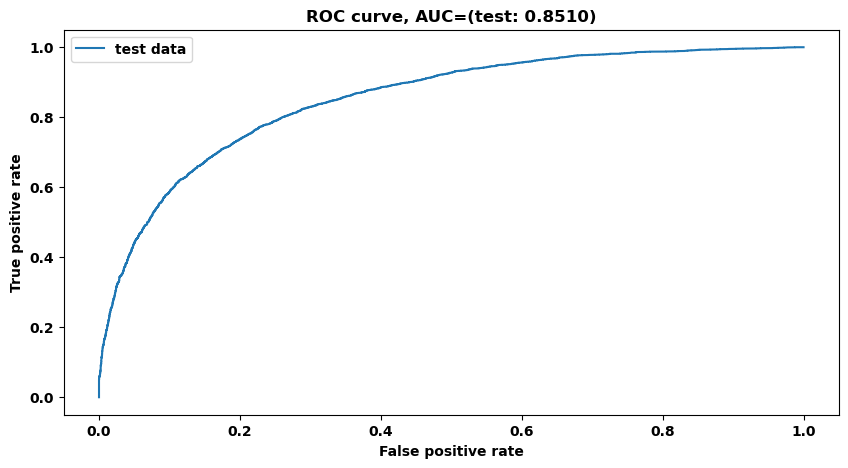

In [354]:
#calculate ROC and plot the curve and check with eval result
y_pred_proba_test = model.predict_proba(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test[:, 1])
auc_test = auc(fpr_test, tpr_test)
plt.title(f"ROC curve, AUC=(test: {auc_test:.4f})")
plt.plot(fpr_test, tpr_test, label="test data")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

# The Metrics of Final Model :

    1) Test accuracy - 78.55 %
    2) AUC - 0.85

In [357]:
FeatureImp = pd.DataFrame(list(zip(X.columns, model.feature_importances_)), columns = ['features', 'Importance'])
FeatureImp.sort_values(by='Importance', ascending=False)

,features,Importance
8,city_King's Landing,0.374435
10,phone_iPhone,0.192753
7,avg_rating_by_driver,0.145549
4,ultimate_black_user,0.088237
3,surge_pct,0.036225
5,weekday_pct,0.034767
2,avg_surge,0.034604
9,city_Winterfell,0.031648
0,trips_in_first_30_days,0.026016
1,avg_rating_of_driver,0.018107


Based on the feature importance, people from King's landing and iphone users are most likely to retain. This could be due to Ultimate application user interface better in iphone than in android. People 

# Suggestion to ultimate :

1) Provide promotions for user to try ultimate_black
2) Provide better service to get higher ratings from the riders.
3) Improve application interface in android